In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

np.random.seed(42)

df = pd.read_csv(r"C:\Users\student\Downloads\heart_disease.csv")
X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [2]:
import mlflow

In [3]:
import mlflow
penalties = ["l1", "l2", "elasticnet"]
for penalty in penalties:
    with mlflow.start_run(run_name=f"logreg_{penalty}"):
        solver = "saga" if penalty in ["l1", "elasticnet"] else "lbfgs"
        l1_ratio = 0.5 if penalty == "elasticnet" else None
        model = LogisticRegression(penalty=penalty, solver=solver, l1_ratio=l1_ratio, max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mlflow.log_param("penalty", penalty)
        mlflow.log_metric("accuracy", model.score(X_test, y_test))
        print(f"\n{penalty.upper()} Regularization:\n", classification_report(y_test, y_pred))

2025/08/18 14:18:11 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet




L1 Regularization:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


L2 Regularization:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


ELASTICNET Regularization:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
wei

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

with mlflow.start_run(run_name="multiple_linear_regression"):
    model = LinearRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Multiple Linear Regression R² Score: {score:.2f}")

Multiple Linear Regression R² Score: 0.59


In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for k in range(1, 6):
    with mlflow.start_run(run_name=f"KNN_k={k}"):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        mlflow.log_param("k", k)
        mlflow.log_metric("accuracy", acc)
        print(f"K={k} → Accuracy: {acc:.2f}")

In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for k in range(1, 6):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        print(f"K={k} → Accuracy: {acc:.2f}")

K=1 → Accuracy: 0.93
K=2 → Accuracy: 0.93
K=3 → Accuracy: 0.93
K=4 → Accuracy: 0.93
K=5 → Accuracy: 0.97


In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"C:\Users\student\Downloads\heart_disease.csv")
x = df.drop("target", axis=1)
y = df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
k_values=range(1,6)
for k in k_values:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    acc=model.score(x_test,y_test)
    print(f"K={k}-> Accuracy: {acc:.2f}")


K=1-> Accuracy: 0.59
K=2-> Accuracy: 0.57
K=3-> Accuracy: 0.69
K=4-> Accuracy: 0.64
K=5-> Accuracy: 0.62


ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

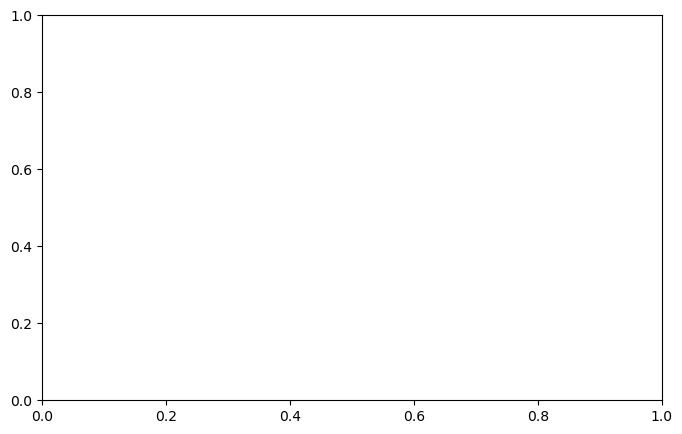

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(k_values,acc,marker='s',color='purple')
plt.title("K Nearest Neighbors Effect of K")
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [15]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
dimensions=[2,10,50,100]
accuracies=[]
for dim in dimensions:
    x,y=make_classification(n_samples=1000,n_features=dim,n_informative=dim//2, n_redundant=0, random_state=42)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
    knn=KNeighborsClassifier(n_neighbors=5)
    y_pred=knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8,5))
plt.plot(dimension,accuracies,marker='o')
plt.title("Curse of Dimensionality in KNN")
plt.xlabel("No of features(Dimensions)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

ValueError: n_classes(2) * n_clusters_per_class(2) must be smaller or equal 2**n_informative(1)=2

In [7]:
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [5]:
print(x)
print(y)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [6]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-